<a href="https://colab.research.google.com/github/Hikaros/ML-Forex-Time-Series-Predictions/blob/master/10_Days_Ahead_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import os
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader.data as web
# from pandas_datareader import web
# plt.style.use('fivethirtyeight')

In [0]:
#Get the stock quote
symbol='DEXUSEU'
df = web.DataReader(symbol, data_source='fred')
#Show teh data
df= df.dropna()
df

,DEXUSEU
DATE,
2010-01-04,1.4419
2010-01-05,1.4402
2010-01-06,1.4404
2010-01-07,1.4314
2010-01-08,1.4357
...,...
2019-12-20,1.1076
2019-12-23,1.1091
2019-12-24,1.1084


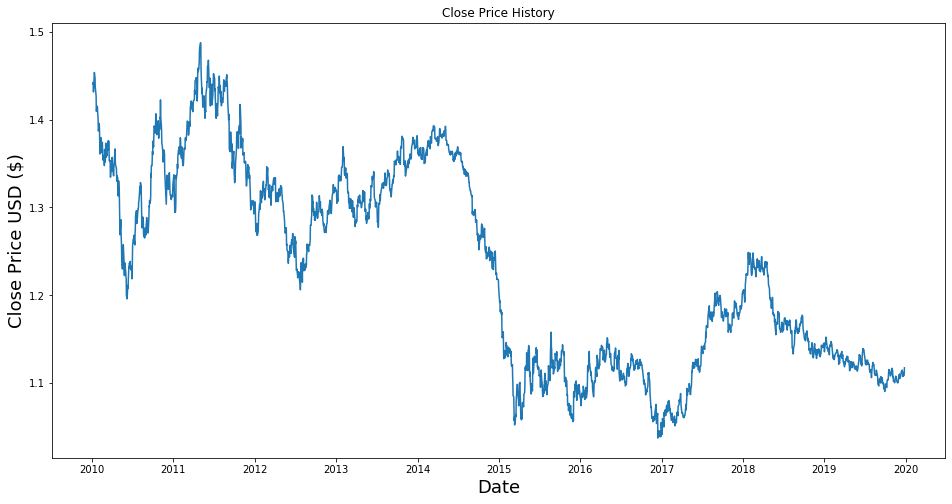

In [0]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df[symbol])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close column
data = df.filter([symbol])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
print(training_data_len)
print(len(dataset))

2000
2500


In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(len(scaled_data))
scaled_data

2500


array([[0.89866667],
       [0.89488889],
       [0.89533333],
       ...,
       [0.15755556],
       [0.16155556],
       [0.17755556]])

In [0]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(200, len(train_data)-10):
  x_train.append(train_data[i-200:i, 0])
  y_train.append(train_data[i:i+10, 0])
  if i<= 201:
    print(x_train)
    print(y_train)



[array([0.89866667, 0.89488889, 0.89533333, 0.87533333, 0.88488889,
       0.92466667, 0.92177778, 0.91488889, 0.91177778, 0.88911111,
       0.86533333, 0.82644444, 0.82911111, 0.83977778, 0.838     ,
       0.81955556, 0.81733333, 0.804     , 0.77666667, 0.78422222,
       0.79555556, 0.78488889, 0.752     , 0.71844444, 0.73866667,
       0.76      , 0.74377778, 0.72555556, 0.72222222, 0.74822222,
       0.72177778, 0.70844444, 0.70288889, 0.71444444, 0.70266667,
       0.71133333, 0.68911111, 0.73      , 0.698     , 0.70866667,
       0.74577778, 0.71022222, 0.71844444, 0.71955556, 0.71355556,
       0.72955556, 0.73311111, 0.75066667, 0.72822222, 0.75177778,
       0.74755556, 0.71733333, 0.70111111, 0.70133333, 0.70222222,
       0.66044444, 0.65977778, 0.67177778, 0.68666667, 0.67422222,
       0.70022222, 0.70977778, 0.69155556, 0.69133333, 0.66733333,
       0.66422222, 0.66333333, 0.68733333, 0.71377778, 0.71488889,
       0.73133333, 0.70333333, 0.69155556, 0.68511111, 0.6824

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train = np.array(x_train)
y_train = np.array(y_train,)

print(x_train.shape)
print(y_train.shape)
# print(y_train[1800])

(1790, 200)
(1790, 10)


In [0]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(y_train.shape)
print(x_train.shape)
print(x_train[0,99])

(1790, 10)
(1790, 200, 1)
[0.42311111]


In [0]:

#Build the LSTM model
model = Sequential()
model.add(LSTM(400, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(200, return_sequences= False))
model.add(Dense(100))
model.add(Dense(10))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train, y_train, batch_size=10, epochs=5)


Epoch 1/5
1790/1790 [==============================] - 232s 130ms/step - loss: 0.0099
Epoch 2/5
1790/1790 [==============================] - 224s 125ms/step - loss: 0.0022
Epoch 3/5
1790/1790 [==============================] - 225s 126ms/step - loss: 0.0022
Epoch 4/5
1790/1790 [==============================] - 224s 125ms/step - loss: 0.0023
Epoch 5/5
1790/1790 [==============================] - 224s 125ms/step - loss: 0.0020


In [0]:

#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 200: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(200, len(test_data)):
  x_test.append(test_data[i-200:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)
x_test.shape

(500, 200)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions.shape)
print(predictions.shape[1])
print(predictions[1])

(500, 10)
10
[1.1889645 1.1915379 1.1878799 1.1902146 1.1910325 1.1908767 1.1940869
 1.1958548 1.1937385 1.1952578]


In [0]:
#Get the root mean squared error (RMSE)
# rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
# rmse

In [0]:
train = data[:training_data_len]
valid = data[training_data_len:]
print(valid)

            DEXUSEU
DATE               
2017-12-26   1.1867
2017-12-27   1.1902
2017-12-28   1.1952
2017-12-29   1.2022
2018-01-02   1.2050
...             ...
2019-12-20   1.1076
2019-12-23   1.1091
2019-12-24   1.1084
2019-12-26   1.1102
2019-12-27   1.1174

[500 rows x 1 columns]


In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
for i in range(0,predictions.shape[0]):
    b= predictions[i,:]
    valid[str(i)]=pd.Series()
    for j in range(len(b)):
      c=i+j
      if c<=499:
        valid[str(i)][c]=b[j]
print(valid)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


            DEXUSEU         0         1  ...       497       498       499
DATE                                     ...                              
2017-12-26   1.1867  1.187973       NaN  ...       NaN       NaN       NaN
2017-12-27   1.1902  1.190483  1.188964  ...       NaN       NaN       NaN
2017-12-28   1.1952  1.186841  1.191538  ...       NaN       NaN       NaN
2017-12-29   1.2022  1.189199  1.187880  ...       NaN       NaN       NaN
2018-01-02   1.2050  1.189979  1.190215  ...       NaN       NaN       NaN
...             ...       ...       ...  ...       ...       ...       ...
2019-12-20   1.1076       NaN       NaN  ...       NaN       NaN       NaN
2019-12-23   1.1091       NaN       NaN  ...       NaN       NaN       NaN
2019-12-24   1.1084       NaN       NaN  ...  1.113825       NaN       NaN
2019-12-26   1.1102       NaN       NaN  ...  1.116491  1.112851       NaN
2019-12-27   1.1174       NaN       NaN  ...  1.114284  1.115590  1.112345

[500 rows x 501 columns]

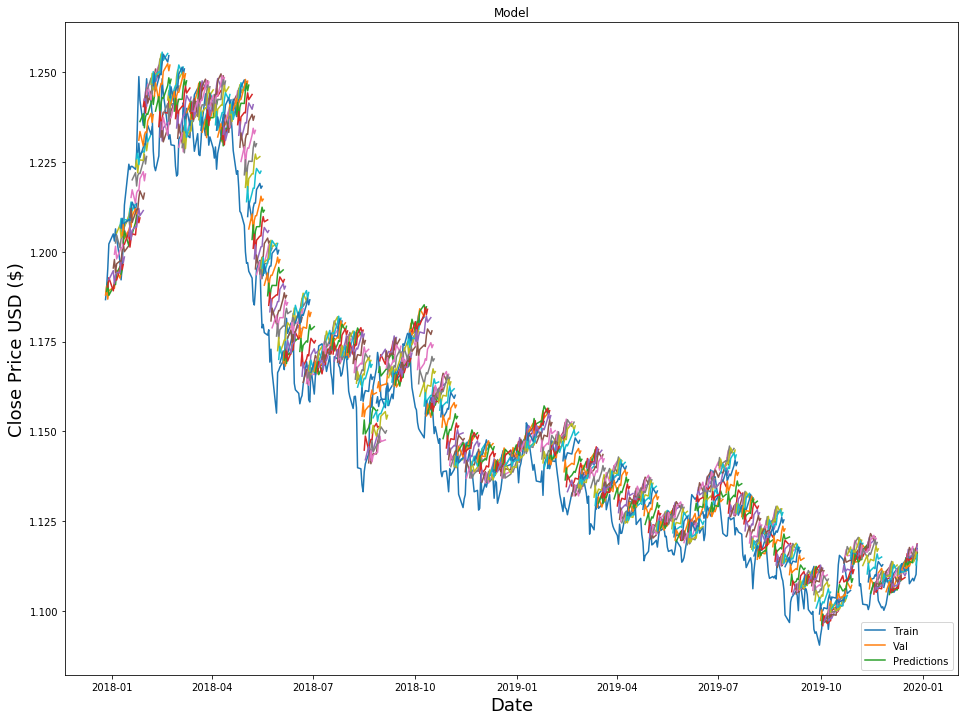

In [0]:

#Visualize the data
plt.figure(figsize=(16,12))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train[symbol])
# plt.plot(valid[[symbol,"0","499"]])
plt.plot(valid)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted prices
valid

,DEXUSEU,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-26,1.1867,1.187973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-27,1.1902,1.190483,1.188964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28,1.1952,1.186841,1.191538,1.190217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-29,1.2022,1.189199,1.187880,1.192809,1.192241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,1.2050,1.189979,1.190215,1.189147,1.194769,1.195507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,1.1076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.114022,1.113316,1.115403,1.114492,1.112449,1.113780,1.114291,1.115173,1.117698,1.115582,NaN,NaN,NaN,NaN
2019-12-23,1.1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.114238,1.113641,1.115778,1.115200,1.113435,1.114935,1.115501,1.115666,1.117979,1.114784,NaN,NaN,NaN
2019-12-24,1.1084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.114551,1.114024,1.116495,1.116190,1.114590,1.116140,1.115991,1.115908,1.117334,1.113825,NaN,NaN


In [0]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-03')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

ValueError: ignored

In [0]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2020-01-03')
print(apple_quote2['Close'])